<a href="https://colab.research.google.com/github/mfavaits/YouTube-Series-on-Machine-Learning/blob/master/Transfer_Learning_with_Finetuning_and_Dropout_ResNet50_with_Data_Augmentation_Dogs_vs_Cats_Small_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import os
import shutil

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
from keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator
conv_base = ResNet50(weights= 'imagenet', include_top=False, input_shape=(150,150,3))
conv_base.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
validation_datagen=ImageDataGenerator(rescale=1./255)
batch_size=20

train_generator=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/training_2000', target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator=validation_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/val_1000', target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
from keras import models
from keras import layers
from keras import optimizers

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable=True
for layer in conv_base.layers[:-10]: #all layers but last 10 layers
    layer.trainable=False

In [14]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])
history = model.fit(train_generator, steps_per_epoch=100, epochs=20, validation_data=validation_generator, validation_steps=50)

Epoch 1/20
100/100 [==============================] - 475s 5s/step - loss: 0.6284 - acc: 0.7525 - val_loss: 0.2244 - val_acc: 0.9060
Epoch 2/20
100/100 [==============================] - 445s 4s/step - loss: 0.3613 - acc: 0.8480 - val_loss: 0.1764 - val_acc: 0.9370
Epoch 3/20
100/100 [==============================] - 447s 4s/step - loss: 0.3138 - acc: 0.8795 - val_loss: 0.1977 - val_acc: 0.9390
Epoch 4/20
100/100 [==============================] - 475s 5s/step - loss: 0.2903 - acc: 0.8915 - val_loss: 0.1971 - val_acc: 0.9370
Epoch 5/20
100/100 [==============================] - 480s 5s/step - loss: 0.2902 - acc: 0.8890 - val_loss: 0.2070 - val_acc: 0.9330
Epoch 6/20
100/100 [==============================] - 487s 5s/step - loss: 0.2617 - acc: 0.9010 - val_loss: 0.2044 - val_acc: 0.9380
Epoch 7/20
100/100 [==============================] - 489s 5s/step - loss: 0.2268 - acc: 0.9140 - val_loss: 0.2028 - val_acc: 0.9400
Epoch 8/20
100/100 [==============================] - 495s 5s/step - 

In [0]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [0]:
epochs=range(1, len(acc)+1)

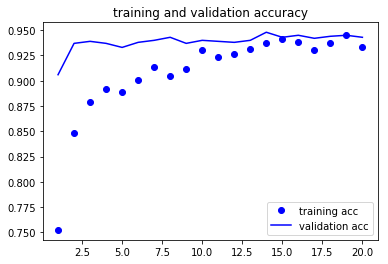

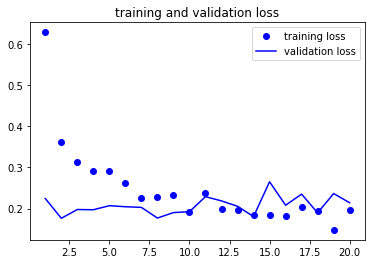

In [17]:
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()